For this group final project on time series analysis, we chose an Excel dataset that outlines **Slovakia's exports to Spain** from January 2006 to September 2024, with **quantity in million €**.



---


Source: https://nbs.sk/statisticke-udaje/vybrane-makroekonomicke-ukazovatele/makroekonomicka-databaza/?timeSeriesId=%5B%222416%22%5D

#  DATA

First, we will import the necessary modules and load our dataset to ensure we have the tools and data ready to analyze and provide the most accurate insights into Slovakia's exports to Spain.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from locale import normalize
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
data = pd.read_excel ('/content/Data.xlsx')
data

,Date,Qty
0,2006-01-01,58.3573
1,2006-02-01,79.9780
2,2006-03-01,85.5183
3,2006-04-01,75.8434
4,2006-05-01,122.9127
...,...,...
220,2024-05-01,242.3299
221,2024-06-01,193.2813
222,2024-07-01,170.3305
223,2024-08-01,157.9242


In [ ]:
aggregated_data = data
data = sales = aggregated_data

We refer to our dataset as either "sales" or "aggregated data."

# 1. Generate a time series graph

Secondly, we present a series graph illustrating the quantity of Slovakia's exports to Spain from January 2006 to September 2024, with quantity in million €.

In [ ]:
print(sales.columns)

Index(['Date', 'Qty'], dtype='object')


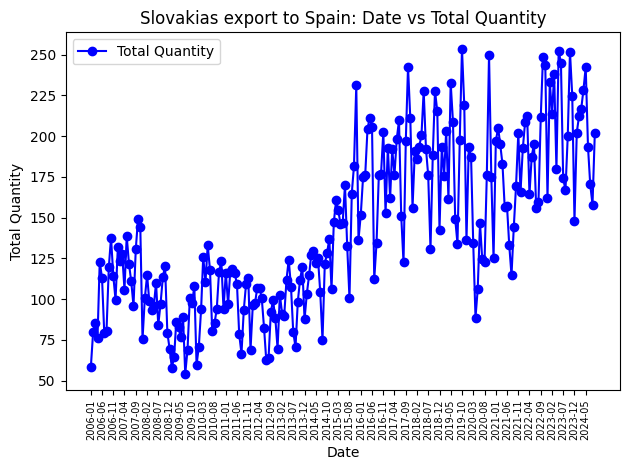

In [ ]:
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
ticks = sales['Date'][::5]
plt.plot(sales['Date'], sales['Qty'], marker='o', linestyle='-', color='b', label='Total Quantity')
plt.xticks(ticks=ticks, labels=ticks.dt.strftime('%Y-%m'), rotation=90, fontsize=7)
plt.title('Slovakias export to Spain: Date vs Total Quantity')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.legend()
plt.show()

The graph shows the time series of Slovakia's exports to Spain and it reveals a clear upward trend, with a steady increase in the volume of exports throughout the observed period. This suggests a growing economic connection or an increasing demand for Slovak goods in Spain.

The data also shows fluctuations that could indicate seasonality, although this pattern isn’t immediately obvious from the graph alone. Further analysis, such as decomposition will help confirm whether these fluctuations happen at regular intervals and align with seasonal trends, possibly reflecting changes in demand due to holidays or market cycles.

The graph also highlights some irregularities, with noticeable peaks and downs pointing to periods of unusually high or low export activity. These variations could be influenced by external factors like economic events, policy changes, or shifts in production capacity.

# 2. Decompose the time series

Now we will decompose the time series into its key components: trend, seasonality, and residuals (random fluctuations). Additionally, we will analyze the data to identify any cyclic patterns, which represent long-term variations distinct from regular seasonal changes.

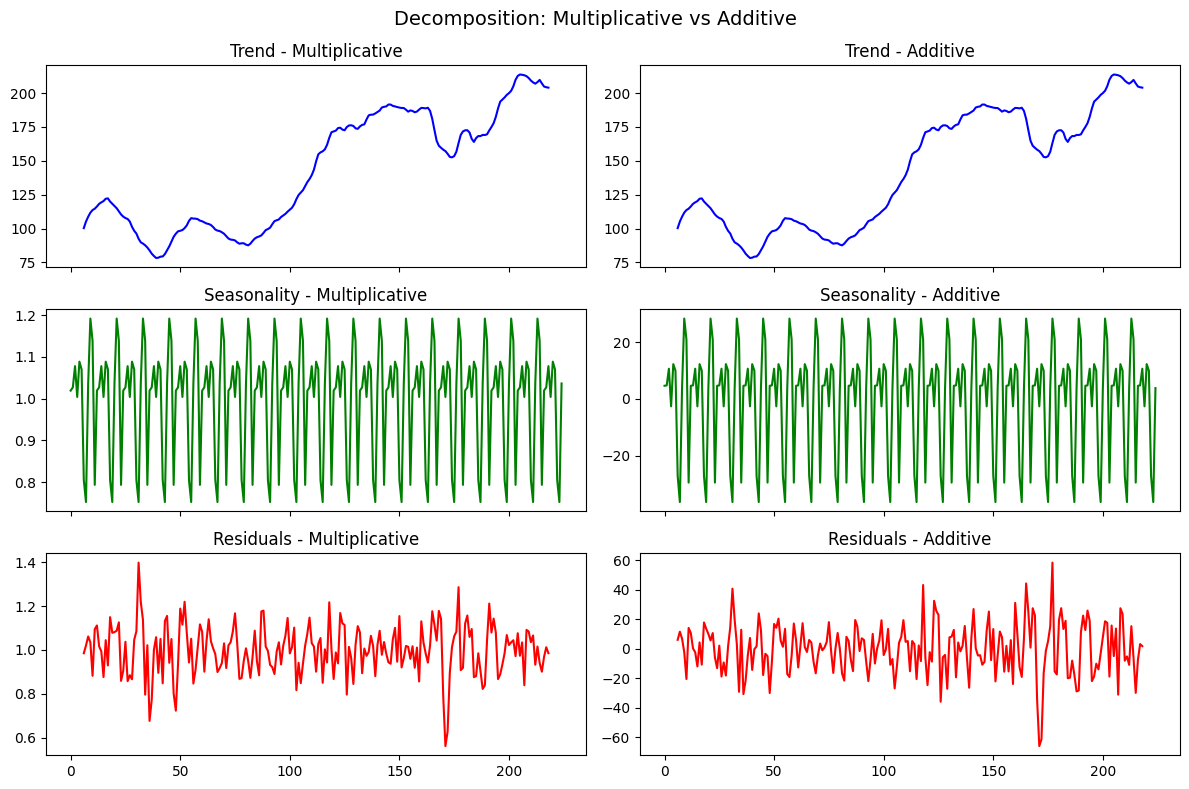

In [ ]:
aggregated_data = aggregated_data.sort_values(by='Date').reset_index(drop=True)

# Perform seasonal decomposition for both multiplicative and additive models
res_decompose_multiplicative = seasonal_decompose(aggregated_data['Qty'], model='multiplicative', period=12)
res_decompose_additive = seasonal_decompose(aggregated_data['Qty'], model='additive', period=12)

# Plot the decomposition results
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharex=True)

# Multiplicative decomposition
res_decompose_multiplicative.trend.plot(ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Trend - Multiplicative', fontsize=12)
res_decompose_multiplicative.seasonal.plot(ax=axs[1, 0], color='green')
axs[1, 0].set_title('Seasonality - Multiplicative', fontsize=12)
res_decompose_multiplicative.resid.plot(ax=axs[2, 0], color='red')
axs[2, 0].set_title('Residuals - Multiplicative', fontsize=12)

# Additive decomposition
res_decompose_additive.trend.plot(ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Trend - Additive', fontsize=12)
res_decompose_additive.seasonal.plot(ax=axs[1, 1], color='green')
axs[1, 1].set_title('Seasonality - Additive', fontsize=12)
res_decompose_additive.resid.plot(ax=axs[2, 1], color='red')
axs[2, 1].set_title('Residuals - Additive', fontsize=12)

# General settings
fig.suptitle('Decomposition: Multiplicative vs Additive', fontsize=14)
fig.tight_layout()
plt.show()



**The trend** shows a steady increase in Slovakia's exports to Spain over time. This means that, overall, exports have been growing. The rise could be due to better trade relationships, higher demand for Slovak products, or the country's ability to produce more. While there are small ups and downs, the steady increase points to long-term growth and stability. For businesses, this growth means they should prepare for higher demand by improving their production, transportation, and workforce. Investing in logistics and infrastructure will help handle the growing export volumes without problems.

The data also shows clear patterns that repeat every year, **seasonality**. These patterns may be linked to holidays, special seasons, or fiscal periods when demand increases. As exports grow, the seasonal highs and lows become bigger, meaning the changes depend on the overall level of exports.Knowing these patterns helps businesses plan better. For example, they can stock up on products before high demand periods or schedule marketing campaigns during these times to boost sales.

**Residuals** are the unexpected changes in the data that don't follow the trend or seasonality. These are caused by unpredictable events like shipping delays, economic shifts, or new policies. While these irregularities are usually small, occasional spikes show that short term surprises can happen. To manage these risks, businesses should keep extra stock or have backup suppliers ready. Planning ahead ensures they can handle sudden disruptions without major issues.

No long term cycles were found in the data, with the main drivers being the continuous trend and seasonal changes.

Based on the analysis, the multiplicative model is better for this time series. This is because the seasonal changes are linked to the overall trend when export volumes go up, the seasonal variations also become larger. This matches the way a multiplicative model works, where different factors influence each other in proportion. On the other hand, an additive model, which assumes seasonal effects stay the same no matter the trend, doesn't capture this relationship well.

# 3. Holt-Winters Prediction

We chose the multiplicative model because We understant that it better captures the underlying patterns in our data.

<ipython-input-16-454fb51d0306>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=aggregated_data['Date'].iloc[-1], periods=12, freq='M')


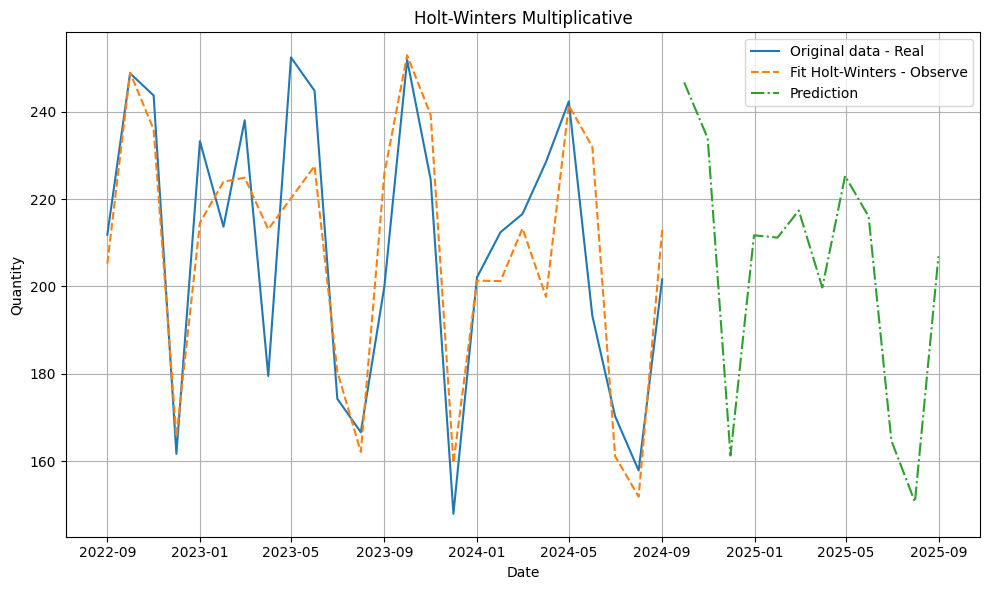

In [ ]:
model = ExponentialSmoothing(aggregated_data['Qty'], seasonal="multiplicative", seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['Date'][200:], aggregated_data['Qty'][200:], label="Original data - Real")
plt.plot(aggregated_data['Date'][200:], fit.fittedvalues[200:], label="Fit Holt-Winters - Observe", linestyle="--")
forecast_dates = pd.date_range(start=aggregated_data['Date'].iloc[-1], periods=12, freq='M')
plt.plot(forecast_dates, forecast, label="Prediction", linestyle="-.")
plt.title("Holt-Winters Multiplicative")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

This graph shows the analysis of Slovakia's exports to Spain, measured in millions of euros, from January 2006 to September 2024. The data reflects the quantity of exports over time, and the graph includes both historical trends and predictions for the future.

* The blue line represents the actual recorded data of Slovakia's exports to Spain. You can see clear ups and downs, which indicate seasonal patterns that repeat regularly, along with some irregular fluctuations.
* The orange dashed line is the fitted data generated using the Holt-Winters Multiplicative Model. This model helps us capture the underlying trends and seasonal patterns in the data, and it closely follows the original export data, showing that the model fits well.
* The green dashed line represents the forecast for the next 12 months. It predicts Slovakia’s export quantities to Spain, showing how the trend and seasonality are expected to continue into the future.


In [ ]:
preditcion=fit.fittedvalues[214:]

By slicing from index 214 onward, we focus on the segment of the dataset where our model’s predictions are most relevant to the current patterns and trends of interest. If our data extends to 225, this selection highlights the final 12 data points (214 to 225), which may capture the most critical or recent aspects of the seasonal cycle or trend, making them particularly valuable for our analysis and decision-making.

# 3.1. ACF

<Figure size 1000x500 with 0 Axes>

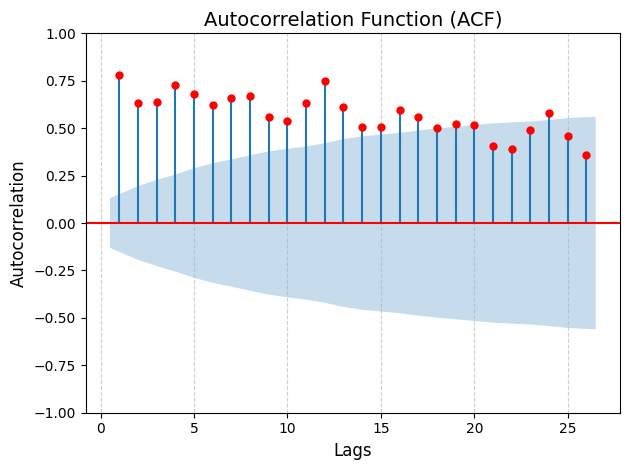

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(aggregated_data['Qty'], lags=26, alpha=0.05, zero=False, color='red')
plt.title("Autocorrelation Function (ACF)", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

The ADF test results indicate that the series is not stationary, as the ADF statistic is greater than the critical values and the p-value (0.871) is much higher than the standard significance level (0.05). This confirms that the mean and variance of the series change over time, which is also consistent with the observed gradual decay in the ACF plot.

# 4. Stationarity of the series

In [ ]:
result = adfuller(aggregated_data['Qty'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -0.5979747539779403
p-value: 0.8714389931254647
The series is not stationary.


Since the data is not stationary, we need to transform it into a stationary series, as ARIMA models require stationarity to perform effectively.

# 4.1. Trend differences

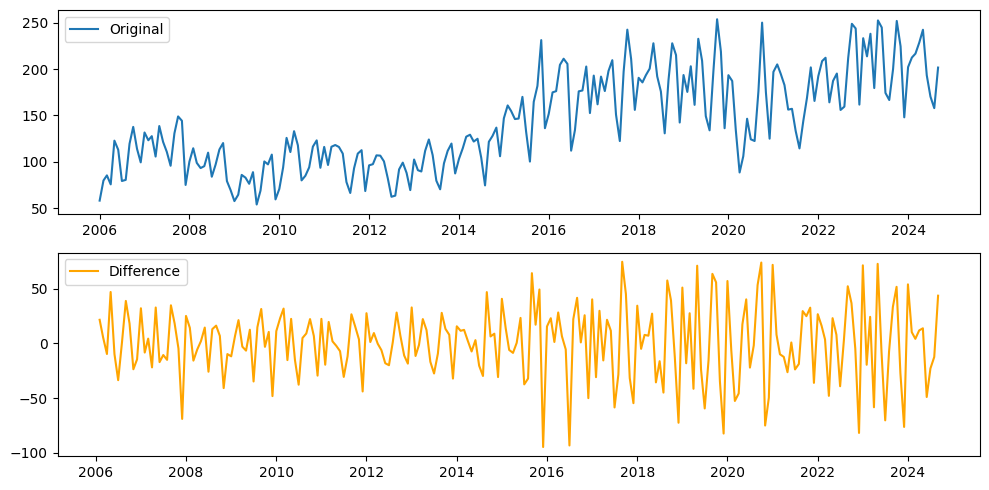

In [ ]:
aggregated_data['Difference'] = aggregated_data['Qty'].diff()
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(aggregated_data['Date'], aggregated_data['Qty'], label='Original')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(aggregated_data['Date'], aggregated_data['Difference'], label='Difference', color='orange')
plt.legend()
plt.tight_layout()
plt.show()


The first graph shows the original time serie data. We can see a pattern of ups and downs that keep repeating through the years, meaning there is a seasonality. Also, we can perceived a slight increase over time which could indicated an upward trend, even if it's weak.

The second graph has been adapted to remove seasonality and trend, obtaining a stationary model.


<Figure size 1000x500 with 0 Axes>

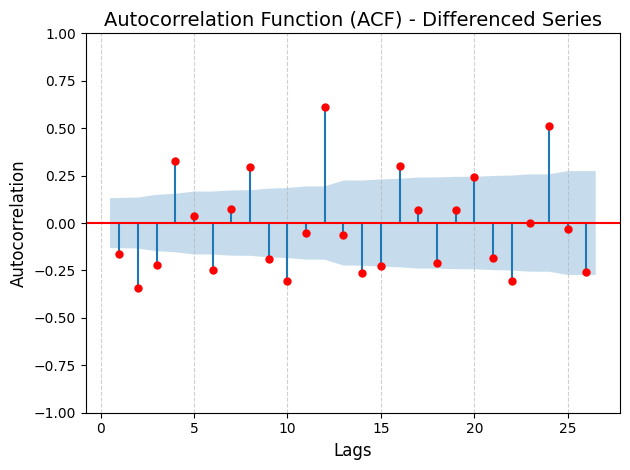

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(aggregated_data['Difference'].dropna(), lags=26, alpha=0.05, zero=False, color='red')
plt.title("Autocorrelation Function (ACF) - Differenced Series", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

With the Autocorrelation Function (ACF), we can find q, by looking at the statistically significant lag of the first half and Q by looking at the stasticaly significant lag at the end of every year (12 months).

q = 0
Q = 1

# 4.2. Time dif 2


<Figure size 1000x500 with 0 Axes>

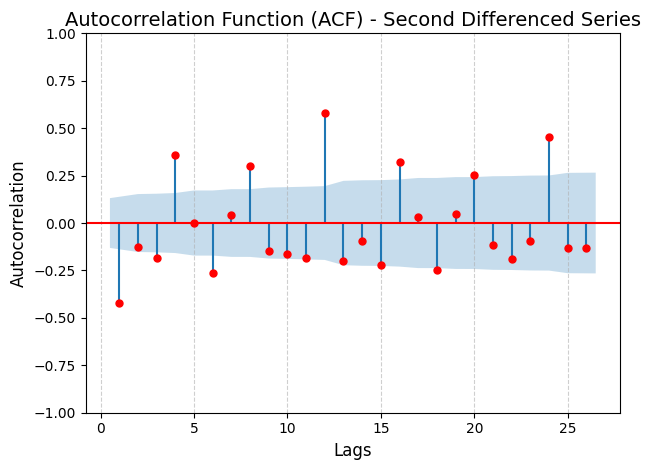

In [ ]:
aggregated_data['Difference_2'] = aggregated_data['Difference'].diff()
plt.figure(figsize=(10, 5))
plot_acf(aggregated_data['Difference_2'].dropna(), lags=26, alpha=0.05, zero=False, color='red')
plt.title("Autocorrelation Function (ACF) - Second Differenced Series", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

With the Autocorrelation Function (ACF), we can find q, by looking at the statistically significant lag of the first half and Q by looking at the stasticaly significant lag at the end of every year (12 months).

q = 0
Q = 1

# 4.3. SEASONAL DIFFERENCES

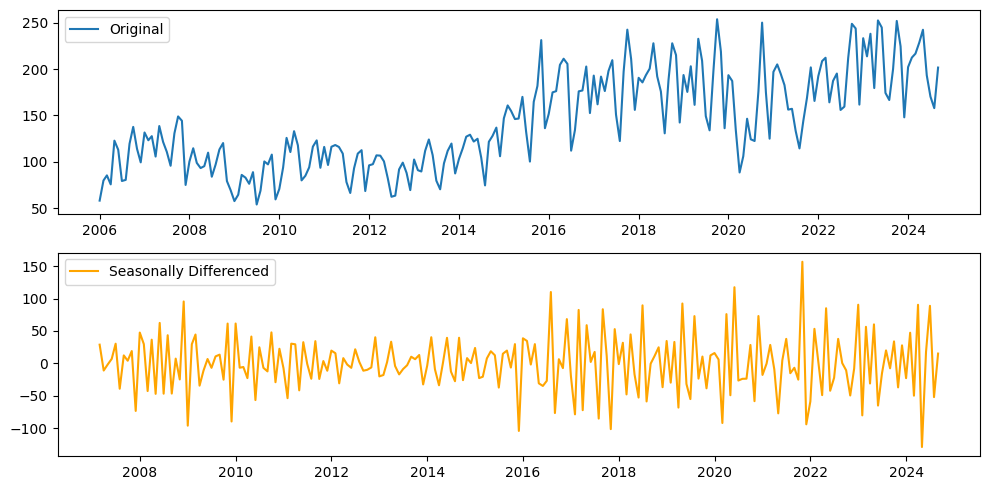

In [ ]:
aggregated_data['Seasonally_Differenced'] = aggregated_data['Difference_2'].diff(12)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(aggregated_data['Date'], aggregated_data['Qty'], label='Original')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(aggregated_data['Date'], aggregated_data['Seasonally_Differenced'], label='Seasonally Differenced', color='orange')
plt.legend()
plt.tight_layout()
plt.show()

In the seasonally differenced series, both trend and seasonality have been effectively removed. What remains are irregular fluctuations (residuals), which are ready for further modeling, such as ARIMA.

<Figure size 1000x500 with 0 Axes>

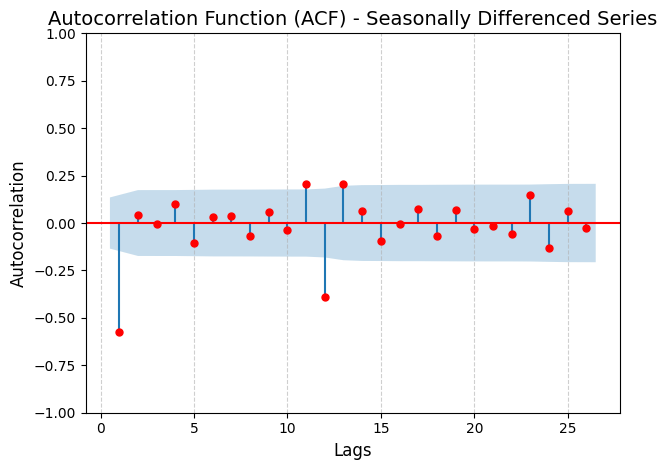

In [ ]:
max_lags = len(aggregated_data['Seasonally_Differenced'].dropna()) - 1
lags_to_plot = min(max_lags, 26)
plt.figure(figsize=(10, 5))
plot_acf(aggregated_data['Seasonally_Differenced'].dropna(), lags=lags_to_plot, alpha=0.05, zero=False, color='red')
plt.title("Autocorrelation Function (ACF) - Seasonally Differenced Series", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
result = adfuller(aggregated_data['Seasonally_Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -6.454451669437069
p-value: 1.4954270250946315e-08
The series is stationary.


This graph of ACF shows a significant spike at lag 1, indicating that a non-seasonal moving average term (q) of 1 is appropriate. However, there are no significant spikes at seasonal lags, such as 12 or 24, suggesting that the seasonal moving average term (Q) should be set to 0. Since the ADF test confirms the series is stationary, with a statistic of -6.45 and a p-value of 1.49e-08, this analysis supports the choice of q = 1 and Q = 0 for ARIMA modeling.

q = 1
Q = 0

# 5. Model and Prediction (ARIMA)

We transformed the time series into a stationary form and proceeded to fit an ARIMA model to effectively capture its underlying dynamics and produce accurate forecasts.

**(p,d,q)x(P,D,Q)s**

<Figure size 1000x500 with 0 Axes>

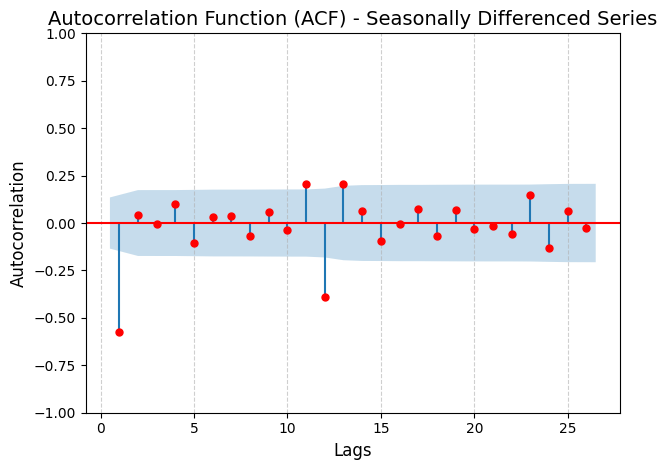

In [ ]:
max_lags = len(aggregated_data['Seasonally_Differenced'].dropna()) - 1
lags_to_plot = min(max_lags, 26)  # Use the smaller of 26 or the available lags

# Create the ACF plot for the seasonally differenced series
plt.figure(figsize=(10, 5))
plot_acf(aggregated_data['Seasonally_Differenced'].dropna(), lags=lags_to_plot, alpha=0.05, zero=False, color='red')

# Customize the plot
plt.title("Autocorrelation Function (ACF) - Seasonally Differenced Series", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

With the Autocorrelation Function (ACF), we can find q, by looking at the statistically significant lag of the first half and Q by looking at the stasticaly significant lag at the end of every year (12 months).

q = 1
Q = 0

<Figure size 1000x500 with 0 Axes>

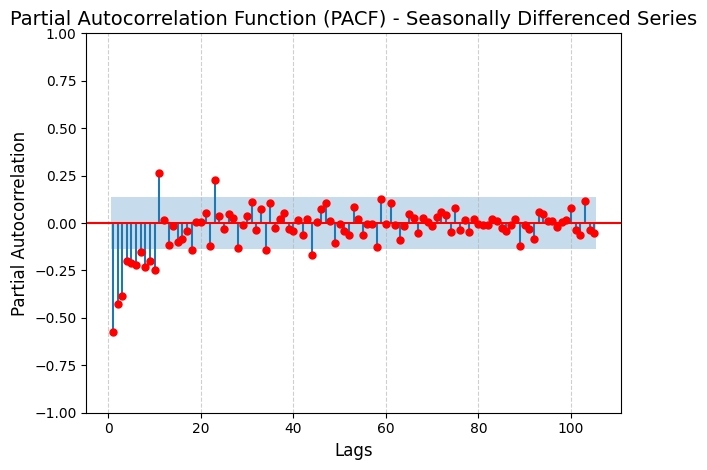

In [ ]:
max_lags = len(aggregated_data['Seasonally_Differenced'].dropna()) // 2

# Create the PACF plot for the seasonally differenced series
plt.figure(figsize=(10, 5))
plot_pacf(aggregated_data['Seasonally_Differenced'].dropna(), lags=max_lags, alpha=0.05, zero=False, color='red')

# Customize the plot
plt.title("Partial Autocorrelation Function (PACF) - Seasonally Differenced Series", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Partial Autocorrelation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


With the Partial Autocorrelation Function (PACF), we can find p, by looking at the statistically significant lag of the first half and P by looking at the stasticalyy significant lag at the end of every year (12 months).

p = 1
P = 0

# 5.1. MODELS

# 1. ARIMA(0,1,1) × (0,1,1)[12]

In [ ]:
model_1 = SARIMAX(aggregated_data['Qty'].dropna(), order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
results_1 = model_1.fit()

print(results_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                Qty   No. Observations:                  225
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -949.441
Date:                            Sat, 28 Dec 2024   AIC                           1904.881
Time:                                    21:02:59   BIC                           1914.951
Sample:                                         0   HQIC                          1908.951
                                            - 225                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5178      0.043    -12.090      0.000      -0.602      -0.434
ma.S.L12      -0.7623      0.042   

this ARIMA (0,1,1) × (0,1,1)[12] model successfully captures the key dynamics of the time series, with significant coefficients for both non-seasonal and seasonal components. While the residuals show some deviation from normality, the overall fit of the model, as evidenced by the low AIC and BIC values, makes it a strong candidate for forecasting future trends. so, as we can observe in the table:

The coefficients, The ma.L1 representing the non-seasonal moving average component, is estimated at -0.5178, with standard error 0.043. This value reflects the immediate impact of past errors on the current series. Its **p-value** is 0.000 indicating that it is statistically significant and strongly contributes to the model. Similarly, the ma.S.L12 captures the seasonal moving average, is -0.7623, with standard error 0.042, with a **p-value** of 0.000 tatistically significant.

The residual variance, sigma2, is estimated at 432.0070, with standard error 35.890. This value represents the variability in the series that remains unexplained by the model.

But the low **AIC** value of 1904.881 and **BIC** of 1914.951 indicate a good fit for the data. These metrics are critical in model selection, and lower values typically suggest a better-performing model.

In [ ]:
sigma2 = results_1.params["sigma2"]
sd_innovations = np.sqrt(sigma2)
print(f"S.D. of innovations: {sd_innovations:.4f}")

S.D. of innovations: 20.7848


We calculated the **Standard Deviation of Innovations** to measure the variability in the residuals and assess how well the ARIMA model fits the data. The result, **20.7848**, shows the average deviation of the residuals from zero. This indicates that while the model captures the patterns in the data reasonably well, some variability remains unexplained.

We will provide this concept for each model of ARIMA.

# 2. ARIMA(1,1,1) × (1,1,0)[12]

In [ ]:
model_2 = SARIMAX(aggregated_data['Qty'].dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results_2 = model_2.fit()
print(results_2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 Qty   No. Observations:                  225
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -964.523
Date:                             Sat, 28 Dec 2024   AIC                           1937.046
Time:                                     21:03:12   BIC                           1950.472
Sample:                                          0   HQIC                          1942.472
                                             - 225                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3061      0.106      2.878      0.004       0.098       0.515
ma.L1         -0.7589      

The 2nd ARIMA(1,1,1) × (1,1,0)[12] model effectively captures both the non-seasonal and seasonal dynamics of Slovakia’s exports to Spain. The statistically significant coefficients and improved diagnostics suggest it is a robust model for analyzing and forecasting this dataset.

The coefficient for ar.L1 is 0.3061, indicating a positive relationship between the current and past values in the series, and the standard  error 0.106. This coefficient is statistically significant, with a p-value of 0.004, well below the standard threshold of 0.05. The ma.L1 has a coefficient of -0.7589, standard error 0.077, with  also highly significant, with a p-value of 0.000. This suggests that recent errors strongly influence the current values in the series.

For the seasonal component, the seasonal autoregressive term ar.S.L12, with standard error 0.960 has a coefficient of -0.4305, with a p-value of 0.000, showing it is significant and captures the recurring annual patterns effectively. Together, these terms highlight the importance of both short-term and seasonal effects in explaining Slovakia's export data.

The residual variance sigma2, with standard error 44.056 is estimated at 516.7933, reflecting the variability in the series that remains unexplained by the model.

The AIC is 1937.046, and the BIC is 1950.472. These values suggest a slightly improved model fit compared to others, with lower AIC and BIC indicating better performance.

In [ ]:
sigma2 = results_2.params["sigma2"]
sd_innovations = np.sqrt(sigma2)
print(f"S.D. of innovations: {sd_innovations:.4f}")

S.D. of innovations: 22.7331


# 3. ARIMA(1,1,0) × (0,1,1)[12]

In [ ]:
model_3 = SARIMAX(aggregated_data['Qty'].dropna(), order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))
results_3 = model_3.fit()
print(results_3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Qty   No. Observations:                  225
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -956.697
Date:                              Sat, 28 Dec 2024   AIC                           1919.394
Time:                                      21:03:15   BIC                           1929.464
Sample:                                           0   HQIC                          1923.464
                                              - 225                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2899      0.055     -5.264      0.000      -0.398      -0.182
ma.S.L12      -0.75

the ARIMA(1,1,0) × (0,1,1)[12] model effectively captures the series' key dynamics, with statistically significant coefficients and diagnostics supporting its reliability. It demonstrates a strong ability to model both short-term and seasonal patterns in Slovakia's export data. So, we observe:

The ar.L1 coefficient, representing the non-seasonal autoregressive component, is -0.2899 with a standard error of 0.055. This coefficient is statistically significant, with a p-value of 0.000, indicating that past values have a meaningful impact on the current series. The ma.S.L12 coefficient, capturing the seasonal moving average term, is estimated at -0.7513 with a standard error of 0.040. This term is also highly significant, with a p-value of 0.000, demonstrating its importance in capturing the annual seasonal effects.

The model’s residual variance sigma2 is estimated at 464.1231, representing the unexplained variability in the series. This value is reasonable, reflecting the model's effectiveness in capturing the data's dynamics.

The AIC is 1919.394, and the BIC is 1929.464. These relatively low values suggest a good fit while balancing the model's complexity.

In [ ]:
sigma2 = results_3.params["sigma2"]
sd_innovations = np.sqrt(sigma2)
print(f"S.D. of innovations: {sd_innovations:.4f}")

S.D. of innovations: 21.5435


# 4. ARIMA(0,1,0) × (0,1,1)[12]

In [ ]:
model_4 = SARIMAX(aggregated_data['Qty'].dropna(), order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
results_4 = model_4.fit()
print(results_4.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Qty   No. Observations:                  225
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -965.992
Date:                              Sat, 28 Dec 2024   AIC                           1935.984
Time:                                      21:03:18   BIC                           1942.697
Sample:                                           0   HQIC                          1938.697
                                              - 225                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7642      0.043    -17.598      0.000      -0.849      -0.679
sigma2       505.55

ARIMA(0,1,0) × (0,1,1)[12] model effectively captures the seasonal patterns in the dataset with a statistically significant seasonal moving average term. However, higher AIC and BIC values and diagnostic results suggest that this model may not perform as well as  other models proposed, as the AIC is 1935.984, and  BIC is 1942.697.

The ma.S.L12 coefficient, which represents the seasonal moving average component, is estimated at -0.7642 with a standard error of 0.043. The p-value for this term is 0.000, indicating it is statistically significant and strongly contributes to capturing the annual seasonal patterns in the data.

The residual variance sigma2 is 505.5567, showing the level of unexplained variability in the series. This value, combined with the standard deviation of innovations, reflects the model's performance. The p-value is also 0.000, making it highly significant.

In [ ]:
sigma2 = results_4.params["sigma2"]
sd_innovations = np.sqrt(sigma2)
print(f"S.D. of innovations: {sd_innovations:.4f}")

S.D. of innovations: 22.4846


Now, let me demonstrate which ARIMA model performs the best. We determine this by identifying the model with the lowest AIC or BIC values, as these metrics indicate a better balance between the model's goodness of fit and its complexity.

In [ ]:
model_results = {
    "ARIMA(0,1,1)x(0,1,1)[12]": results_1.aic,
    "ARIMA(1,1,1)x(1,1,0)[12]": results_2.aic,
    "ARIMA(1,1,0x(0,1,1)[12]": results_3.aic,
    "ARIMA(0,1,0)x(0,1,1)[12]": results_4.aic
}
best_model_name = min(model_results, key=model_results.get)
best_aic_value = model_results[best_model_name]
print(f"The best model is {best_model_name} with an AIC value of {best_aic_value}.")
model_results_bic = {
      "ARIMA(0,1,1)x(0,1,1)[12]": results_1.bic,
    "ARIMA(1,1,1)x(1,1,0)[12]": results_2.bic,
    "ARIMA(1,1,0x(0,1,1)[12]": results_3.bic,
    "ARIMA(0,1,0)x(0,1,1)[12]": results_4.bic
}
best_model_bic_name = min(model_results_bic, key=model_results_bic.get)
best_bic_value = model_results_bic[best_model_bic_name]
print(f"The best model based on BIC is {best_model_bic_name} with a BIC value of {best_bic_value}.")

The best model is ARIMA(0,1,1)x(0,1,1)[12] with an AIC value of 1904.8812872365202.
The best model based on BIC is ARIMA(0,1,1)x(0,1,1)[12] with a BIC value of 1914.951046060536.


Based on the AIC and BIC values, the first ARIMA model emerges as the best choice, striking the optimal balance between accuracy and complexity.

# 5.2. PREDICTIONS

And now, we will present the predictions for Slovakia's exports to Spain. These predictions can guide policymakers in shaping trade policies, help businesses plan production and logistics, and support financial institutions in assessing market stability and making investment decisions, ensuring more informed and strategic actions.

<ipython-input-38-a80f22d405f1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=pred_steps, freq='M')


         Date  Prediction  Lower_Confidence  Upper_Confidence
0  2024-10-31  243.906171        203.168267        284.644076
1  2024-11-30  230.310741        185.084902        275.536580
2  2024-12-31  166.290624        116.983666        215.597581
3  2025-01-31  216.729180        163.654032        269.804328
4  2025-02-28  216.860869        160.267873        273.453864
5  2025-03-31  221.182762        161.278148        281.087377
6  2025-04-30  199.719046        136.676532        262.761561
7  2025-05-31  224.941562        158.910097        290.973028
8  2025-06-30  213.508458        144.617601        282.399314
9  2025-07-31  174.074822        102.438616        245.711027
10 2025-08-31  163.419107         89.138950        237.699264
11 2025-09-30  208.254728        131.421548        285.087907


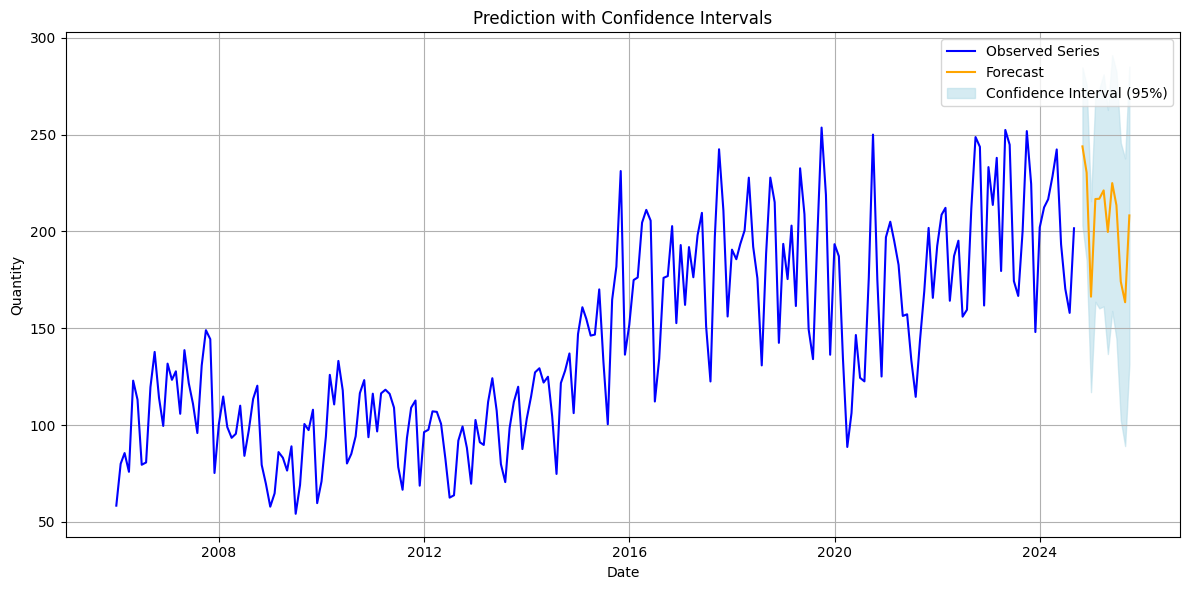

In [ ]:
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
pred_steps = 12
forecast = results_1.get_forecast(steps=pred_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
last_date = aggregated_data['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=pred_steps, freq='M')
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Prediction': forecast_values.values,
    'Lower_Confidence': confidence_intervals.iloc[:, 0].values,
    'Upper_Confidence': confidence_intervals.iloc[:, 1].values
})
print(forecast_df)
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['Date'], aggregated_data['Qty'], label="Observed Series", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Prediction'], label="Forecast", color="orange")
plt.fill_between(
    forecast_df['Date'],
    forecast_df['Lower_Confidence'],
    forecast_df['Upper_Confidence'],
    color="lightblue",
    alpha=0.5,
    label="Confidence Interval (95%)"
)
plt.title("Prediction with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

This graph provides a clear picture of what we might expect for Slovakia's exports to Spain, helping to understand past trends and make informed decisions for the future.

Basically, the graph representing Slovakia’s exports to Spain, showing both the past trends and a forecast for the future. The blue line represents the actual data, capturing the ups and downs of export quantities over time. WE can see clear seasonal patterns, with regular fluctuations that reflect how trade varies throughout the year.

The orange line shows the predicted export quantities for the next 12 months, from October 2024 to September 2025. Based on the trends and patterns from the past, the forecast suggests that exports may initially dip slightly but will continue to fluctuate in line with the seasonal cycles we've seen before.

The light blue shaded area around the forecast highlights the uncertainty in the predictions. This area represents a 95% confidence interval, meaning that the actual export quantities are very likely to fall within this range. The further out we forecast, the wider this range becomes, as predictions naturally get less certain over time.
Representing this prediction in table, would be:

In [ ]:
forecast_df

,Date,Prediction,Lower_Confidence,Upper_Confidence
0,2024-10-31,243.906171,203.168267,284.644076
1,2024-11-30,230.310741,185.084902,275.536580
2,2024-12-31,166.290624,116.983666,215.597581
3,2025-01-31,216.729180,163.654032,269.804328
4,2025-02-28,216.860869,160.267873,273.453864
5,2025-03-31,221.182762,161.278148,281.087377
6,2025-04-30,199.719046,136.676532,262.761561
7,2025-05-31,224.941562,158.910097,290.973028
8,2025-06-30,213.508458,144.617601,282.399314
9,2025-07-31,174.074822,102.438616,245.711027


## 6. Conclusions



This project delved into Slovakia’s exports to Spain, treating the time series data as a **map to uncover hidden** patterns, forecast the road ahead, and guide strategic decisions. By carefully charting the data’s behavior, we created predictions designed to help optimize resources, discover new opportunities, and prepare for potential twists and turns in the market. Actually, this project proves that statistical modeling is more than just a technical exercise, **it’s a compass for navigating complex markets**. By uncovering the rhythm and flow of Slovakia’s exports to Spain, we have equipped stakeholders with the foresight to make smarter decisions, like any great journey, **success lies not just in knowing where you’ve been, but in confidently charting the course ahead.**

We began by shining a light on the dataset, visualizing its trends and patterns. What we saw was a rhythm—clear seasonal cycles that repeated annually, accompanied by a steady upward climb in export volumes. Like understanding the tides, we broke the data into its core components: trend, seasonality, and residuals. This step revealed the powerful pull of annual seasonality and the steady current of growth, making it clear that our models needed to reflect these dynamics.

The ADF test acted as our compass, showing that the series was **not stationary**. To steady the ship, we applied differencing, transforming the series into a stable form while keeping its defining features intact. Recognizing that the seasonal variations grew and shrank in proportion to the trend, we turned to the **multiplicative Holt-Winters model** as one of our guides.

At the same time, we explored different **ARIMA**, where the best one was the 1st one, (0,1,1)(0,1,1)(12), letting statistical tools like AIC and BIC point us to the best-fitting model. Our 4 models delivered forecasts for the next 12 months, and we made  predictions that were also presented in a table, making them clear and accessible for all stakeholders.

Aditionally, the predictions from the **ARIMA model and the Holt-Winters model** can be likened to two different navigational tools for charting Slovakia’s exports to Spain. The Holt-Winters model, with its multiplicative configuration, is particularly adept at capturing the regular seasonal fluctuations in the export data. Its forecasts for the next 12 months align closely with the repeating annual patterns observed in the historical data. For instance, Holt-Winters provides a smoother prediction curve that stays closely tied to the seasonal highs and lows. However, while it excels at staying on course with the seasons, it struggles when the waters become unpredictable, offering less insight into the unexpected currents that might sway the trade.

On the other hand, the ARIMA model is a full-fledged captain, equipped not just with a compass but with radar and weather forecasts. It goes beyond simply tracking seasonal waves and takes into account broader trends and irregularities. For instance, the ARIMA forecast for October 2024 predicts exports of **243.91 million euros**, with a safety net of confidence ranging between **203.17 and 284.64 million euros**. By December 2024, when the tides of trade appear to dip, ARIMA anticipates a quantity of **166.29 million euros**, rising again to **216.73 million euros** in January 2025 as the cycles shift. This flexibility allows ARIMA to adapt to both steady winds and sudden storms, offering a more reliable course for long-term navigation.


These forecasts are not just numbers—they’re a **beacon for decision-makers**.

For **policymakers**, these predictions provide a clear view of anticipated export volumes, enabling them to design targeted trade policies. For instance, as exports are expected to dip in December 2024 and the summer of 2025, policymakers might prioritize trade incentives or agreements during those periods to stabilize the sector. Conversely, for higher export months like October 2024 and April-May 2025, strategies could focus on maximizing opportunities, such as promoting Slovakia’s products more aggressively in international markets.

For **businesses**, these forecasts act as a roadmap for operational planning. For example, lower export months like December 2024, July 2025, and August 2025 suggest a need for tighter inventory control and reduced production to prevent overstocking. Meanwhile, anticipated higher export volumes in October 2024, March-May 2025, and September 2025 indicate periods where businesses should ramp up production, secure adequate logistics capacity, and ensure smooth supply chain operations. Such foresight helps businesses avoid unnecessary costs while meeting customer demand efficiently.

For **financial institutions and investors**, these forecasts offer clarity for assessing market conditions and investment opportunities. Lower-confidence periods, like December 2024 and the summer months of 2025, might signal caution for investments in export-reliant businesses. However, higher-confidence periods, such as April-May 2025, could be leveraged to support growth in sectors likely to thrive during those months. Financial institutions could also use this data to offer tailored products, such as export financing or trade credit, to businesses in need of capital during peak export months.



